In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

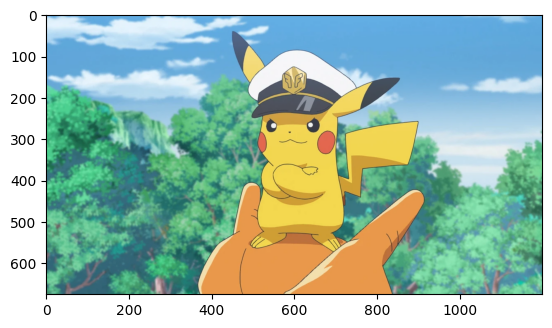

In [7]:
img = cv2.imread("images/image1.webp")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


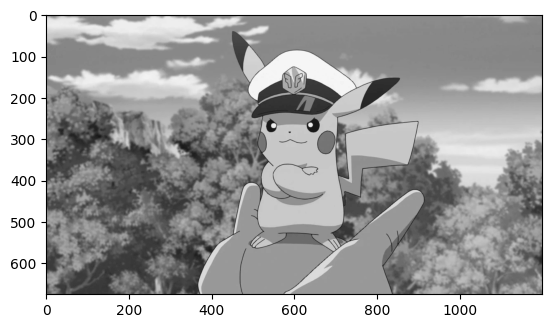

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#gray = cv2.equalizeHist(gray)
plt.imshow(gray, cmap='gray')

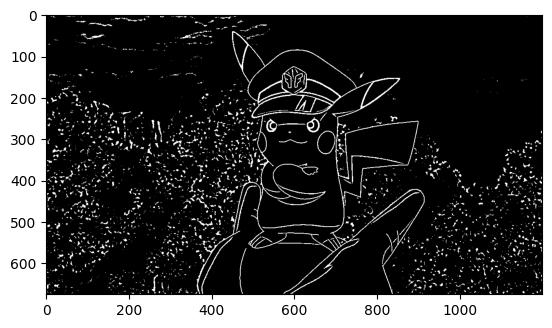

In [9]:
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY+cv2.THRESH_BINARY_INV,13,7)

#kernel_prewitt_vertical = np.array([[1, 0, -1], 
#                                    [1, 0, -1], 
#                                    [1, 0, -1]])
#imagem_prewitt_vertical = cv2.filter2D(gray, -1, kernel_prewitt_vertical)

#kernel_prewitt_horizontal = np.array([[1, 1, 1], 
#                                      [0, 0, 0], 
#                                      [-1, -1, -1]])
#imagem_prewitt_horizontal = cv2.filter2D(gray, -1, kernel_prewitt_horizontal)
#blur = cv2.GaussianBlur(gray, (3,3), 0)
#thresh = cv2.Canny(gray, 200, 200)
#kernel = np.ones((3,3),np.uint8)
#theshDilated = cv2.dilate(thresh, kernel)

plt.imshow(thresh, cmap="gray")


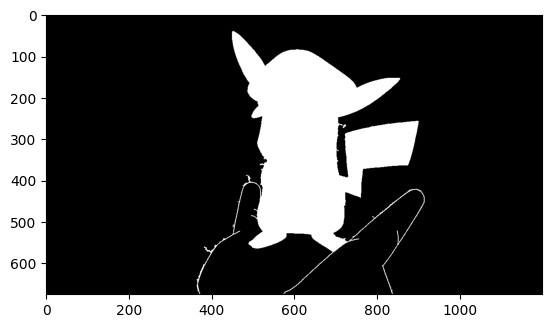

In [10]:
#kernel = np.ones((3,3), np.uint8)
#dilated = cv2.dilate(thresh, kernel, iterations=1)
#eroded = cv2.erode(kernel, kernel, iterations=1)

#midian = cv2.medianBlur(thresh, 3)

cnts, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
cnts = sorted(cnts, key=cv2.contourArea)[-1]
# print(img.shape[:2])
# print(len(cnts))
mask = np.zeros(img.shape[:2], dtype="uint8")
maskredRed = cv2.drawContours(mask,cnts, -1, (0,0,255), -1)
maskedFinal = cv2.drawContours(mask,[cnts], -1, (255,255,255), -1)


plt.imshow(maskedFinal, cmap="gray")

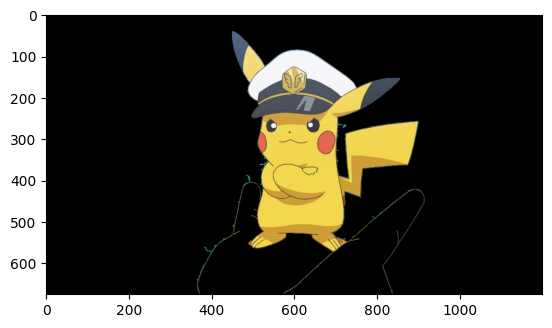

In [11]:
final = cv2.bitwise_and(img, img, mask=maskredRed)
plt.imshow(final)